In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [ ]:
# Loading data
data = pd.read_csv("iris.csv", index_col='Id')

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
Id                                                                       
1             5.1           3.5            1.4           0.2  Iris-setosa
2             4.9           3.0            1.4           0.2  Iris-setosa
3             4.7           3.2            1.3           0.2  Iris-setosa
4             4.6           3.1            1.5           0.2  Iris-setosa
5             5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


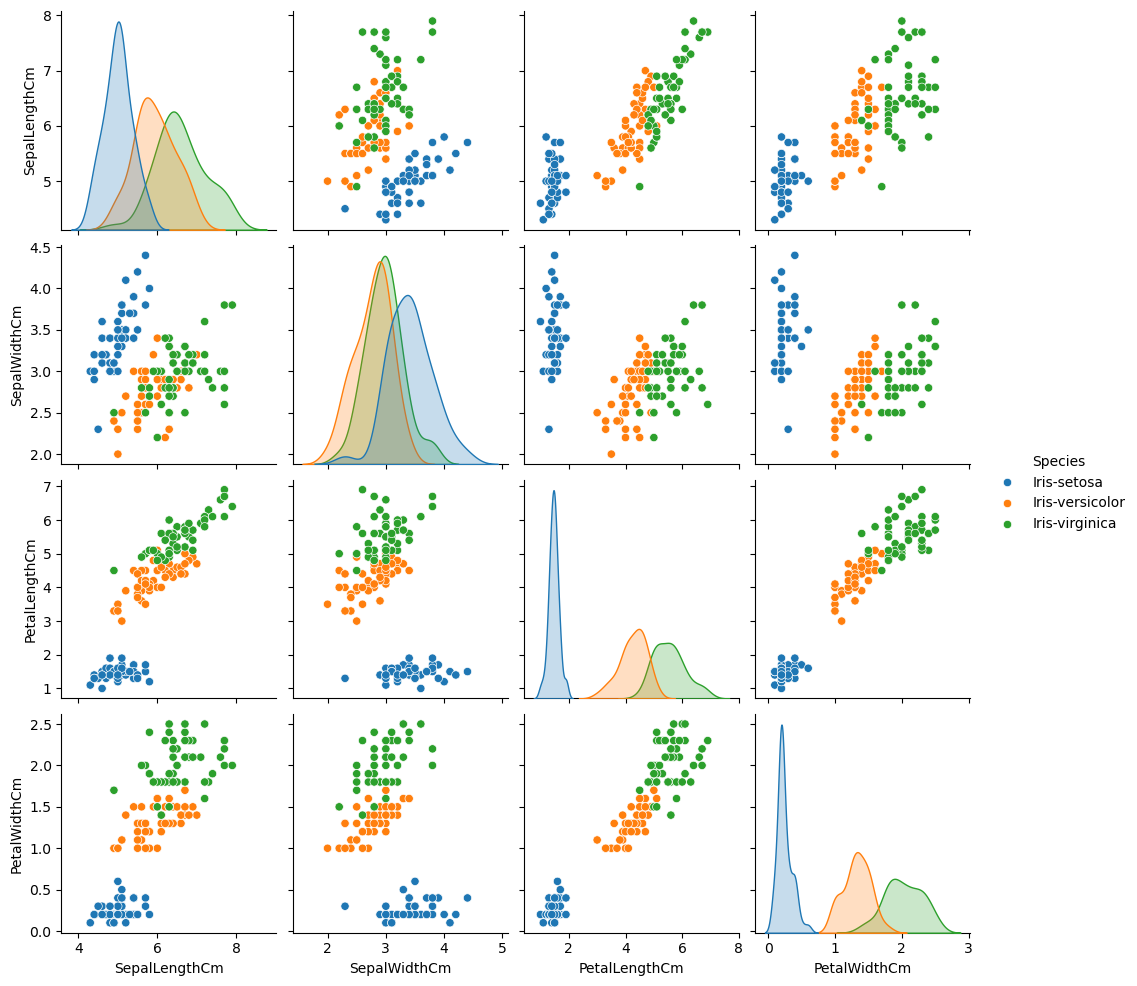

In [ ]:
# EDA (Exploratory data analysis)
print(data.head())
print(data['Species'].value_counts())
sns.pairplot(data, hue="Species")
plt.show()


In [ ]:
# Highlighting the features (Without Species)
X = data.drop(columns=['Species'])

In [ ]:
# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

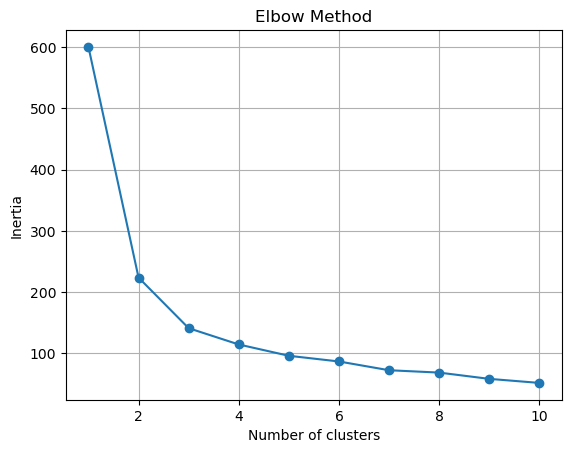

In [ ]:
# Elbow method for choosing k
inertia = []
k_range = range(1, 11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=0)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.grid()
plt.show()

In [ ]:
# Choosing k = 3 (expecting 3 classes of flowers)
k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
clusters = kmeans.fit_predict(X_scaled)


d:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
#Adding clusters to dataframe
data['Cluster'] = clusters

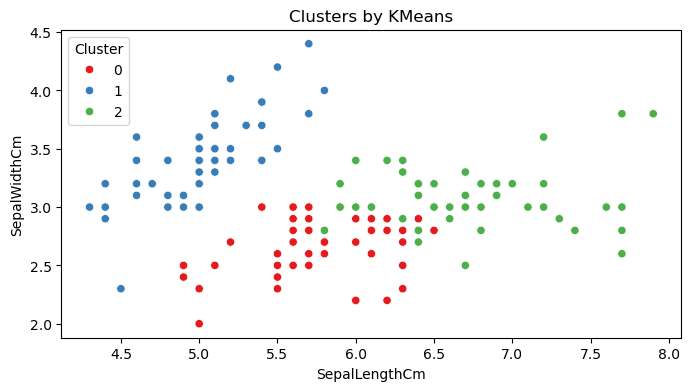

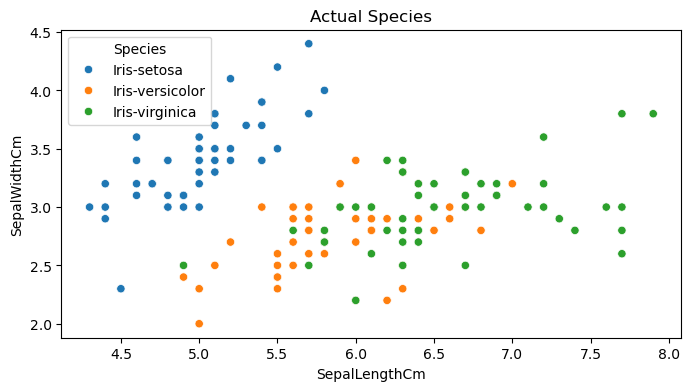

In [ ]:
#Comparing clusters and real labels
plt.figure(figsize=(8, 4))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Cluster', data=data, palette='Set1')
plt.title('Clusters by KMeans')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=data)
plt.title('Actual Species')
plt.show()

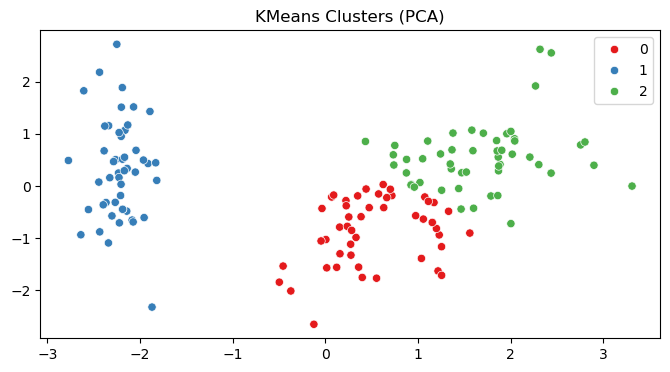

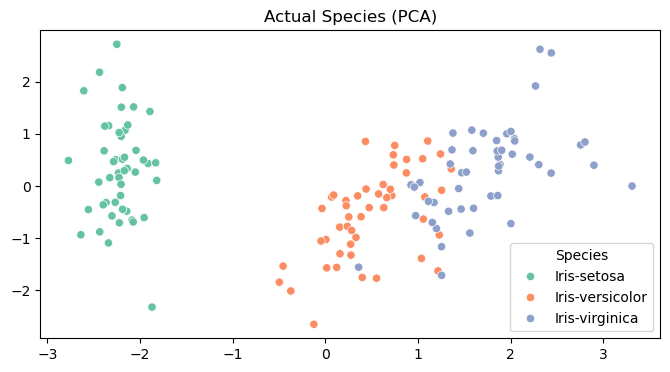

In [ ]:
#Visualisation with PCa
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='Set1')
plt.title('KMeans Clusters (PCA)')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Species'], palette='Set2')
plt.title('Actual Species (PCA)')
plt.show()

In [ ]:
#Rating accuracy of clasterisation.
score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.456
